In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
credittest = pd.read_csv("C:/Users/sudarshanm/Documents/practise/ds14/data_train.csv")
credittest.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,17406,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111616.770,0
1,94453,2,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0
2,92577,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153711.960,0
3,130625,2,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0
4,97174,4,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128369.460,0


In [3]:
credittest.shape

(19805, 371)

In [4]:
credittest=credittest.drop(['imp_op_var41_comer_ult1','imp_op_var41_comer_ult3','imp_op_var39_efect_ult1','imp_op_var39_efect_ult3' 
,'imp_op_var39_ult1','ind_var2_0'],axis=1)

In [5]:
credittest=credittest.drop(['ind_var2','ind_var13_medio','ind_var13','ind_var18', 'ind_var26_cte','ind_var26','ind_var25_0','ind_var25'],axis=1)

In [6]:
creddittest=credittest.drop(['ind_var27_0','ind_var28_0','ind_var28','ind_var27','ind_var29_0', 'ind_var29','ind_var32','ind_var34_0' ,'ind_var34','ind_var37' 
],axis=1)

In [7]:
creddittest=credittest.drop(['ind_var40_0','ind_var40','ind_var41_0','ind_var41' ,'ind_var39','ind_var44','ind_var46_0','ind_var46','num_var1_0','num_var1' ],axis=1)


In [8]:
credittest=credittest.drop([ 'num_var5',
 'num_var6_0', 
'num_var6',
 'num_var8_0', 
'num_var8', 
 'num_var12',
 'num_var13_corto_0', 
'num_var13_corto',
'num_var13_largo' ,
'num_var13_medio_0'
],axis=1)

In [9]:
credittest=credittest.drop([ 'num_var31','num_var32','num_var34_0','num_var34','num_var35','num_var37','num_var40_0','num_var40','num_var41_0','num_var41'],axis=1)

In [10]:

credittest=credittest.drop(['num_var39',
 'num_var44_0',
 'num_var44',
 'num_var46_0',
 'num_var46',
 'saldo_var6',
 'saldo_var13_medio', 
 'saldo_var18' ,
 'saldo_var24',
 'saldo_var25'],axis=1)

In [11]:
credittest=credittest.drop([   'saldo_var28',
 'saldo_var27',
 'saldo_var29',
 'saldo_var34',
 'saldo_var40',
 'saldo_var41',
 'saldo_var42',
 'saldo_var46',
 'delta_imp_amort_var18_1y3'
,'delta_imp_amort_var34_1y3'
],axis=1)

In [12]:
credittest=credittest.drop([    'delta_imp_trasp_var33_out_1y3', 
 'delta_num_aport_var13_1y3', 
'delta_num_aport_var17_1y3',
'delta_num_aport_var33_1y3' ,
'delta_num_compra_var44_1y3',
'delta_num_reemb_var13_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_reemb_var33_1y3' ,
'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var17_out_1y3', 
'delta_num_trasp_var33_in_1y3'
],axis=1)

In [13]:
credittest=credittest.drop([     'delta_num_venta_var44_1y3',
 'imp_amort_var18_hace3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_hace3',
 'imp_amort_var34_ult1' ,
 'imp_aport_var33_ult1',
 'imp_reemb_var13_hace3',
 'imp_reemb_var17_hace3',
 'imp_reemb_var33_hace3',
 'imp_reemb_var33_ult1'
],axis=1)

In [14]:
credittest=credittest.drop(['imp_trasp_var17_in_hace3',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var17_out_ult1',
 'imp_trasp_var33_in_ult1', 
'imp_trasp_var33_out_hace3',
 'imp_trasp_var33_out_ult1' ,
'imp_venta_var44_ult1',
 'ind_var7_emit_ult1',
'ind_var9_cte_ult1'
],axis=1)

In [15]:
credittest=credittest.drop(['ind_var9_ult1',
'num_var2_0_ult1',
 'num_var2_ult1',
'num_aport_var17_hace3',
'num_aport_var33_ult1',
 'num_var7_emit_ult1',
 'num_med_var22_ult3' ,
 'num_meses_var12_ult3',
 'num_meses_var13_corto_ult3',
'num_meses_var13_medio_ult3',
 'num_meses_var33_ult3',
'num_op_var41_comer_ult1', 
'num_op_var41_comer_ult3'
],axis=1)

In [16]:
credittest=credittest.drop(['num_op_var39_efect_ult1',
 'num_op_var39_efect_ult3',
 'num_reemb_var13_hace3' ,
'num_reemb_var13_ult1',
 'num_reemb_var17_hace3',
 'num_reemb_var17_ult1',
 'num_reemb_var33_hace3',
 'num_reemb_var33_ult1',
 'num_trasp_var17_in_hace3',
 'num_trasp_var17_in_ult1',
 'num_trasp_var17_out_hace3',
 'num_trasp_var17_out_ult1',
 'num_trasp_var33_in_hace3',
 'num_trasp_var33_in_ult1'
],axis=1)

In [17]:
credittest=credittest.drop(['num_venta_var44_hace3',
 'num_var45_ult3',
 'saldo_medio_var8_ult3',
 'saldo_medio_var13_corto_ult1',
 'saldo_medio_var13_corto_ult3',
 'saldo_medio_var13_largo_ult3',
 'saldo_medio_var17_ult1',
 'saldo_medio_var17_ult3',
 'saldo_medio_var29_hace3',
 'saldo_medio_var29_ult1' ,
'saldo_medio_var29_ult3',
 'saldo_medio_var33_ult1',
 'saldo_medio_var33_ult3',
 'saldo_medio_var44_ult1',
 'saldo_medio_var44_ult3' 
],axis=1)

In [18]:
credittest=credittest.drop(['ind_var13_corto',
 'ind_var13_largo',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var29_0',
 'ind_var29',
 'ind_var32',
 'ind_var34_0',
 'ind_var34',
 'ind_var37',
 'ind_var40_0',
 'ind_var40',
 'ind_var41_0',
 'ind_var41',
 'ind_var39',
 'ind_var44',
 'ind_var46_0',
 'ind_var46',
 'num_var1_0',
 'num_var1',
 'num_var13_medio',
 'num_var13',
 'num_var14',
 'num_var17',
 'num_var18',
 'num_var20_0',
 'num_var20',
 'num_var24_0',
 'num_var24',
 'num_var26',
 'num_var25_0',
 'num_var25',
 'num_op_var40_ult3',
'num_op_var39_hace2',
 'num_op_var39_hace3',
 'num_op_var39_ult1',
 'num_op_var39_ult3',
 'num_var28_0',
 'num_var28' ,
'num_var27',
 'num_var29_0',
 'num_var29' ,
  'saldo_medio_var12_ult1',
 'saldo_medio_var12_ult3'
],axis=1)

In [19]:
credittest.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,var38,TARGET
0,17406,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111616.770,0
1,94453,2,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0
2,92577,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153711.960,0
3,130625,2,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0
4,97174,4,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128369.460,0


def results(balancing_technique):
    print(balancing_technique)
    fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6))
    model_name = ["Random Forest", "XG Boosting", "LG Boosting", "Bayesian Classifier","Logistic Reg", "Decision Tree"]
    RFC = RandomForestClassifier(random_state = 0)
    XGBC = XGBClassifier(random_state = 0)
    LGBC = LGBMClassifier(random_state = 0)
    BC = BaggingClassifier(random_state = 0)
    LR = LogisticRegression()
    DT = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)

    for clf,i in zip([RFC, XGBC, LGBC, BC,LR,DT], model_name):
        model = clf.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:,1]
        print("#"*25,i,"#"*25)
        print("Training Accuracy = {:.3f}".format(model.score(X_train, y_train)))
        print("Test Accuracy = {:.3f}".format(model.score(X_test, y_test)))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
        #Confusion Matrix
        print(confusion_matrix(y_test, y_pred))
        print("-"*15,"CLASSIFICATION REPORT","-"*15)
        print(classification_report(y_test, y_pred))
        
        #precision-recall curve
        precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
        avg_pre = average_precision_score(y_test, y_pred_prob)
        ax1.plot(precision, recall, label = i+ " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
        ax1.set_xlabel('Precision', fontsize = 14)
        ax1.set_ylabel('Recall', fontsize = 14)
        ax1.set_title('Precision-Recall Curve', fontsize = 18)
        ax1.legend(loc = 'best')
        #find default threshold
        close_default = np.argmin(np.abs(thresholds_pr - 0.5))
        ax1.plot(precision[close_default], recall[close_default], 'o', markersize = 8)

        #roc-curve
        fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr,tpr)
        ax2.plot(fpr,tpr, label = i+ " area = {:0.2f}".format(roc_auc), lw = 3, alpha = 0.7)
        ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
        ax2.set_xlabel("False Positive Rate", fontsize = 14)
        ax2.set_ylabel("True Positive Rate", fontsize = 14)
        ax2.set_title("ROC Curve", fontsize = 18)
        ax2.legend(loc = 'best')
        #find default threshold
        close_default = np.argmin(np.abs(thresholds_roc - 0.5))
        ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
        plt.tight_layout()
        

In [20]:
def results(balancing_technique):
    print(balancing_technique)
    fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6))
    model_name = ["XG Boosting", "LG Boosting","Bagging", "K-NN" ]
    XGBC = XGBClassifier(random_state = 0)
    LGBC = LGBMClassifier(random_state = 0)
    BG = BaggingClassifier()
    KNN = KNeighborsClassifier()

    for clf,i in zip([XGBC, LGBC, BG, KNN], model_name):
        model = clf.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:,1]
        print("#"*25,i,"#"*25)
        print("Training Accuracy = {:.3f}".format(model.score(X_train, y_train)))
        print("Test Accuracy = {:.3f}".format(model.score(X_test, y_test)))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
        #Confusion Matrix
        print(confusion_matrix(y_test, y_pred))
        print("-"*15,"CLASSIFICATION REPORT","-"*15)
        print(classification_report(y_test, y_pred))
        
        #precision-recall curve
        precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
        avg_pre = average_precision_score(y_test, y_pred_prob)
        ax1.plot(precision, recall, label = i+ " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
        ax1.set_xlabel('Precision', fontsize = 14)
        ax1.set_ylabel('Recall', fontsize = 14)
        ax1.set_title('Precision-Recall Curve', fontsize = 18)
        ax1.legend(loc = 'best')
        #find default threshold
        close_default = np.argmin(np.abs(thresholds_pr - 0.5))
        ax1.plot(precision[close_default], recall[close_default], 'o', markersize = 8)

        #roc-curve
        fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr,tpr)
        ax2.plot(fpr,tpr, label = i+ " area = {:0.2f}".format(roc_auc), lw = 3, alpha = 0.7)
        ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
        ax2.set_xlabel("False Positive Rate", fontsize = 14)
        ax2.set_ylabel("True Positive Rate", fontsize = 14)
        ax2.set_title("ROC Curve", fontsize = 18)
        ax2.legend(loc = 'best')
        #find default threshold
        close_default = np.argmin(np.abs(thresholds_roc - 0.5))
        ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
        plt.tight_layout()

In [35]:
####2.Up-Sampling


#Note in up sampling, first split the minority class data into train and test set and then up-sample the train data and test it with test data
X = credittest.drop(['TARGET','ID'],axis = 1)
y = credittest['TARGET']
#First split data into train and test
X_train_us, X_test, y_train_us, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
#Now resample the train data
credit_us = pd.concat([X_train_us, y_train_us], axis = 1)
train_majority = credit_us[credit_us.TARGET == 0]
train_minority = credit_us[credit_us.TARGET == 1]
print("Before Sampling",train_majority.shape, train_minority.shape,'\n'*3)


train_minority_upsampled = resample(train_minority, replace = True, n_samples = 12608, random_state = 0)
print("After Up Sampling",train_majority.shape, train_minority_upsampled.shape)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])

X_train = train_upsampled.drop(['TARGET'],axis = 1)
y_train = train_upsampled['TARGET']

print(X_train.shape)
print(y_train.shape)


Before Sampling (12608, 197) (1255, 197) 



After Up Sampling (12608, 197) (12608, 197)
(25216, 196)
(25216,)


Up Sampling
######################### XG Boosting #########################
Training Accuracy = 0.836
Test Accuracy = 0.798
ROC_AUC_score : 0.786962
[[4311 1078]
 [ 125  428]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       0.97      0.80      0.88      5389
           1       0.28      0.77      0.42       553

   micro avg       0.80      0.80      0.80      5942
   macro avg       0.63      0.79      0.65      5942
weighted avg       0.91      0.80      0.83      5942

######################### LG Boosting #########################
Training Accuracy = 0.906
Test Accuracy = 0.832
ROC_AUC_score : 0.774338
[[4555  834]
 [ 164  389]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      5389
           1       0.32      0.70      0.44       553

   micro avg       0.83      0.83      0.83      5942
   macr

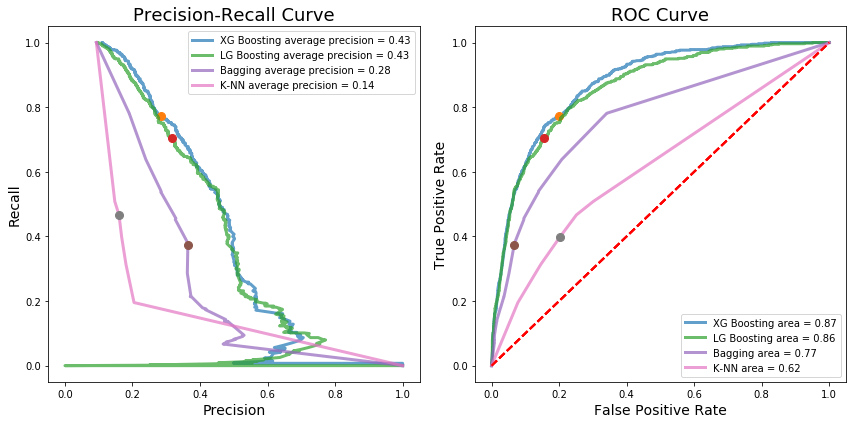

In [36]:
results("Up Sampling")

In [37]:
##SMOTE FAMILY
####SMOTE Regular

sm = SMOTE(random_state = 0)
X = credittest.drop(['TARGET','ID'],axis = 1)
y = credittest['TARGET']
X_train_sm, X_test, y_train_sm, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train, y_train = sm.fit_sample(X_train_sm, y_train_sm)
X_test = np.array(X_test)
y_test = np.array(y_test)


print(X_train.shape)
print(y_train.shape)

(25216, 196)
(25216,)


SMOTE Regular
######################### XG Boosting #########################
Training Accuracy = 0.925
Test Accuracy = 0.878
ROC_AUC_score : 0.713847
[[4936  453]
 [ 270  283]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      5389
           1       0.38      0.51      0.44       553

   micro avg       0.88      0.88      0.88      5942
   macro avg       0.67      0.71      0.69      5942
weighted avg       0.90      0.88      0.89      5942

######################### LG Boosting #########################
Training Accuracy = 0.953
Test Accuracy = 0.901
ROC_AUC_score : 0.686708
[[5121  268]
 [ 319  234]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5389
           1       0.47      0.42      0.44       553

   micro avg       0.90      0.90      0.90      5942
   ma

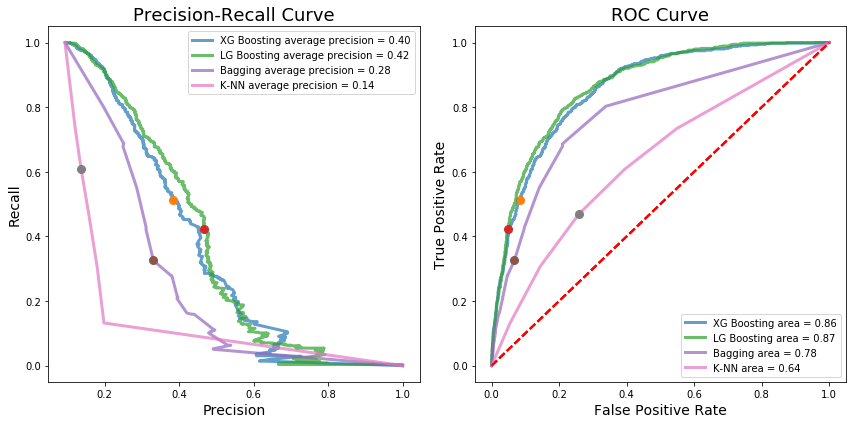

In [38]:
results("SMOTE Regular")

In [39]:
#### ADASYN

adasyn = ADASYN(random_state = 0)
X = credittest.drop(['TARGET','ID'],axis = 1)
y = credittest['TARGET']
X_train_as, X_testa, y_train_as, y_testa = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train, y_train = adasyn.fit_sample(X_train_as, y_train_as)
X_test = np.array(X_testa)
y_test = np.array(y_testa)


print(X_train.shape)
print(y_train.shape)

(25360, 196)
(25360,)


ADASYN
######################### XG Boosting #########################
Training Accuracy = 0.926
Test Accuracy = 0.879
ROC_AUC_score : 0.717371
[[4935  454]
 [ 266  287]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      5389
           1       0.39      0.52      0.44       553

   micro avg       0.88      0.88      0.88      5942
   macro avg       0.67      0.72      0.69      5942
weighted avg       0.90      0.88      0.89      5942

######################### LG Boosting #########################
Training Accuracy = 0.954
Test Accuracy = 0.899
ROC_AUC_score : 0.686499
[[5109  280]
 [ 318  235]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5389
           1       0.46      0.42      0.44       553

   micro avg       0.90      0.90      0.90      5942
   macro avg

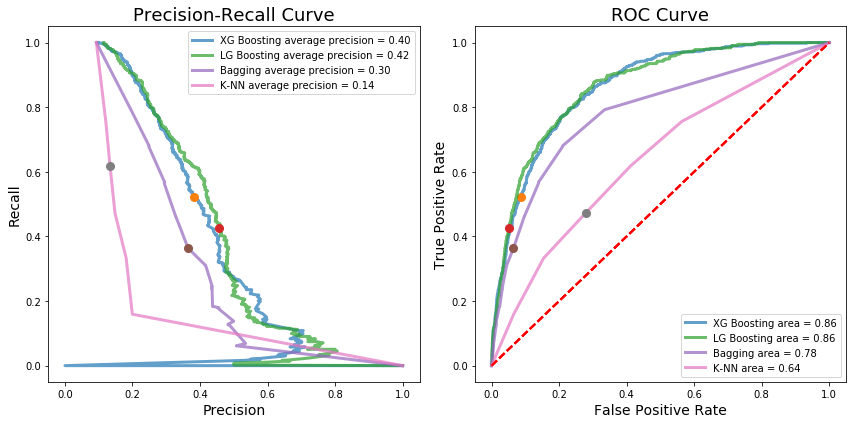

In [40]:
results("ADASYN")

In [21]:
##SMOTE FAMILY
#### SVM SMOTE

svmsm = SVMSMOTE(random_state = 0)
X = credittest.drop(['TARGET','ID'],axis = 1)
y = credittest['TARGET']
X_train_svm, X_test, y_train_svm, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train, y_train = svmsm.fit_sample(X_train_svm, y_train_svm)
X_test = np.array(X_test)
y_test = np.array(y_test)


print(X_train.shape)
print(y_train.shape)

(25216, 196)
(25216,)


SVMSMOTE
######################### XG Boosting #########################
Training Accuracy = 0.928
Test Accuracy = 0.890
ROC_AUC_score : 0.739815
[[4982  407]
 [ 246  307]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      5389
           1       0.43      0.56      0.48       553

   micro avg       0.89      0.89      0.89      5942
   macro avg       0.69      0.74      0.71      5942
weighted avg       0.90      0.89      0.90      5942

######################### LG Boosting #########################
Training Accuracy = 0.953
Test Accuracy = 0.901
ROC_AUC_score : 0.691483
[[5114  275]
 [ 313  240]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5389
           1       0.47      0.43      0.45       553

   micro avg       0.90      0.90      0.90      5942
   macro a

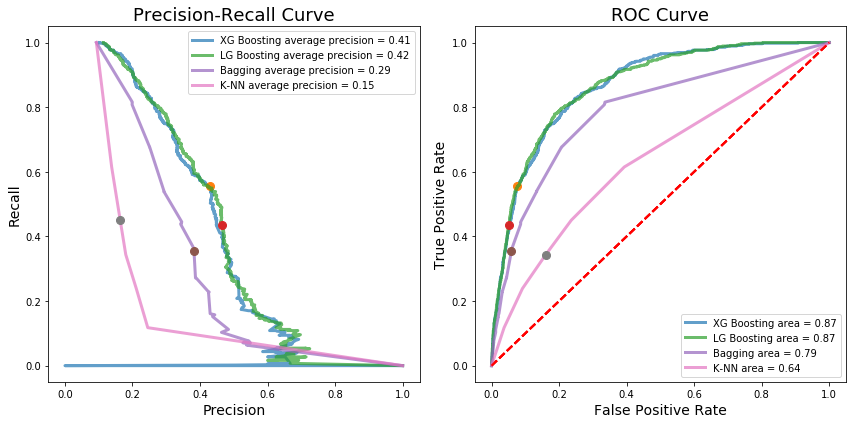

In [22]:
results("SVMSMOTE")

In [25]:
from imblearn.ensemble import BalancedRandomForestClassifier
clf = BalancedRandomForestClassifier(max_depth=2, random_state=0)

model = clf.fit(X_train, y_train) 

In [26]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]
print("#"*25,"RF","#"*25)
print("Training Accuracy = {:.3f}".format(model.score(X_train, y_train)))
print("Test Accuracy = {:.3f}".format(model.score(X_test, y_test)))
print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))

#Confusion Matrix
print(confusion_matrix(y_test, y_pred))
print("-"*15,"CLASSIFICATION REPORT","-"*15)
print(classification_report(y_test, y_pred))

######################### RF #########################
Training Accuracy = 0.801
Test Accuracy = 0.732
ROC_AUC_score : 0.656657
[[4037 1352]
 [ 241  312]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       0.94      0.75      0.84      5389
           1       0.19      0.56      0.28       553

   micro avg       0.73      0.73      0.73      5942
   macro avg       0.57      0.66      0.56      5942
weighted avg       0.87      0.73      0.78      5942



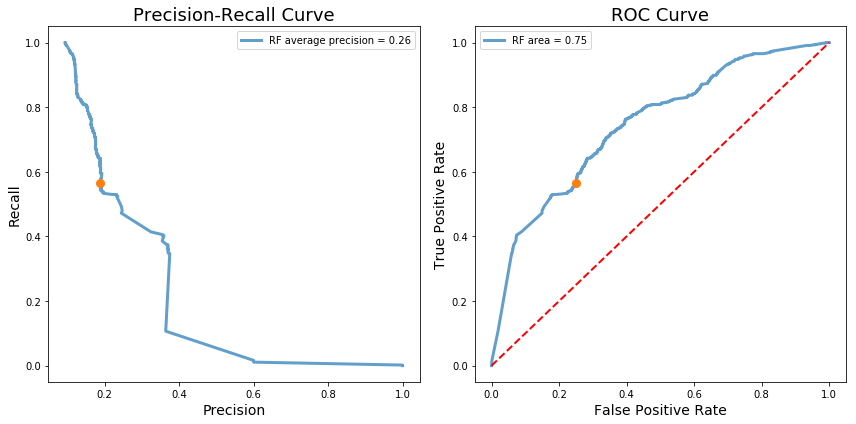

In [28]:

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6))
#precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
avg_pre = average_precision_score(y_test, y_pred_prob)
ax1.plot(precision, recall, label = "RF"+ " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
ax1.set_xlabel('Precision', fontsize = 14)
ax1.set_ylabel('Recall', fontsize = 14)
ax1.set_title('Precision-Recall Curve', fontsize = 18)
ax1.legend(loc = 'best')

#find default threshold
close_default = np.argmin(np.abs(thresholds_pr - 0.5))
ax1.plot(precision[close_default], recall[close_default], 'o', markersize = 8)

#roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = "RF"+ " area = {:0.2f}".format(roc_auc), lw = 3, alpha = 0.7)
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')

#find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()